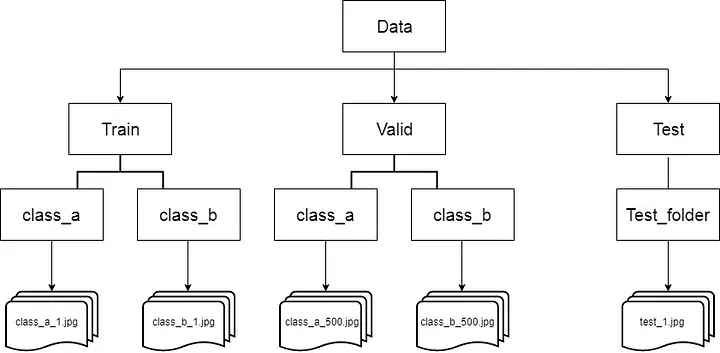

In [1]:
!pwd
import os
os.getcwd()

/home/serkan/Belgeler/bilsem23_24/O2A2_2324/ML/kopek_duygulari


'/home/serkan/Belgeler/bilsem23_24/O2A2_2324/ML/kopek_duygulari'

In [2]:
print(os.getcwd())
"/home/serkan/Belgeler/bilsem23_24/O2A2_2324/ML/kopek_duygulari/dog_emotions/images"

print(os.path.join(os.getcwd(),"dog_emotions","images"))


/home/serkan/Belgeler/bilsem23_24/O2A2_2324/ML/kopek_duygulari
/home/serkan/Belgeler/bilsem23_24/O2A2_2324/ML/kopek_duygulari/dog_emotions/images


In [7]:
yol1=os.path.join(os.getcwd(),"dog_emotions","images")

print(os.path.exists(yol1))

True


In [ ]:
# her bir duygunun klasörünün içindeki resim dosya isimleri 
# bir liste halinde "files_dict" sözlüğüne duygu adı key olacak şekilde eklenmiştir.
classes = ['angry', 'happy', 'relaxed', 'sad']
source_directory = os.path.join(os.getcwd(),"dog_emotions",'images')
files_dict = dict()
for c in classes:
    source_class_dir = os.path.join(source_directory, c)
    file_list = os.listdir(source_class_dir)
    files_dict[c] = file_list
     

print(files_dict["sad"])
print(len(files_dict["sad"]))



In [15]:
# data klasörü/dizini kaynak dizine oluşturuluyor
base_directory = os.path.join(os.getcwd(), 'data')
if not os.path.exists(base_directory):
    os.mkdir(base_directory)

# data içine oluşturulacak "train","valid" ve "test" dizinlerinin olması gereken adres yol bilgisini oluşturuyor.
train_directory = os.path.join(base_directory, 'train')
validation_directory = os.path.join(base_directory, 'validation')
test_directory = os.path.join(base_directory, 'test')
# oluşturulan bu adreslerde bu dizinlerin olup olmadığı kontrol edilerek yoksa bu dizinler ilgili adres bilgisinden yararlanılarak oluşturuluyor.
if not os.path.exists(train_directory):
    os.mkdir(train_directory)
if not os.path.exists(validation_directory):
    os.mkdir(validation_directory)
if not os.path.exists(test_directory):
    os.mkdir(test_directory)


In [16]:
# classes = ['angry', 'happy', 'relaxed', 'sad']

for c in classes:
    train_class_dir = os.path.join(train_directory, c)
    validation_class_dir = os.path.join(validation_directory, c)
    test_class_dir = os.path.join(test_directory, c)

    if not os.path.exists(train_class_dir):
        os.mkdir(train_class_dir)
    if not os.path.exists(validation_class_dir):
        os.mkdir(validation_class_dir)
    if not os.path.exists(test_class_dir):
        os.mkdir(test_class_dir)
    
    

In [22]:
import random
train_proportion = 0.75
valid_proportion = 0.15
test_proportion = 0.1

train_files_dict = {}
valid_files_dict = {}
test_files_dict = {}

for c in classes:
    file_list = files_dict[c]
    random.shuffle(file_list)
    file_count = len(file_list)
    train_count = int(file_count * train_proportion)
    valid_count = int(file_count * valid_proportion)
    test_count = int(file_count * test_proportion)

    train_files = file_list[:train_count]
    valid_files = file_list[train_count:train_count + valid_count]
    test_files = file_list[train_count + valid_count:]

    train_files_dict[c] = train_files
    valid_files_dict[c] = valid_files
    test_files_dict[c] = test_files


In [25]:
for c in classes:
    print(c)
    print("train:",len(train_files_dict[c]))
    print("valid",len(valid_files_dict[c]))
    print("test:",len(test_files_dict[c]))
    print("total:",len(files_dict[c]))

angry
train: 1692
valid 338
test: 226
total: 2256
happy
train: 3588
valid 717
test: 479
total: 4784
relaxed
train: 3261
valid 652
test: 436
total: 4349
sad
train: 3399
valid 679
test: 454
total: 4532


In [31]:
for c in classes:
    for f in train_files_dict[c]:
        source = os.path.join(source_directory, c, f)
        destination = os.path.join(train_directory, c, f)
        os.symlink(source, destination)
    for f in valid_files_dict[c]:
        source = os.path.join(source_directory, c, f)
        destination = os.path.join(validation_directory, c, f)
        os.symlink(source, destination)
    for f in test_files_dict[c]:
        source = os.path.join(source_directory, c, f)
        destination = os.path.join(test_directory, c, f)
        os.symlink(source, destination)
    